In [1]:
import numpy as np

import os

from statsmodels.stats.api import DescrStatsW
from scipy.stats import ttest_rel, sem

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'square'
n_classes = 2
budget = 50

policies = [
    'ens jensen greedy',
    'greedy',
    # 'round robin greedy',
    'classical ens'
]

n_exps = 20
init_size = 1
group_size = n_classes - 1

basepath = os.path.join('../../data/results', data, str(group_size))

probs = np.ones((len(policies), n_exps, budget, n_classes), dtype=float) * -1

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        tmp_probs = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__probs__{i + 1}.csv'),
            delimiter=','
        )
        
        probs[p_ind, i, :, :] = tmp_probs
        
assert np.all(probs != -1)

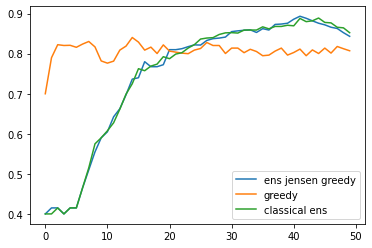

In [3]:
for p_ind, policy in enumerate(policies):
    plt.plot(probs.mean(axis=1)[..., 1][p_ind], label=policy)
    
plt.legend();